# Analysing incidents of forest fires in Brazil
I have got the dataset from [here](https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil). 

In the project I'll try to find:
1. Average yearly cases of forest fires in each Brazilian state mentioned in the dataset.
2. Which month had most cases of forest fire since 1998?
3. Average number of forest fires in each month.

## First we'll import libraries and our data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
amazon = pd.read_csv('amazon.csv', encoding = 'latin-1')
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [8]:
amazon

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


### Let's make some important changes in our dataset to make our work easier.

In [9]:
# Let's convert Portuguese month names to English month names.
amazon.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [12]:
# We'll use this map to change month names
month_map = {'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 
             'Maio': 'May', 'Junho': 'June', 'Julho': 'July','Agosto': 'August', 'Setembro': 'September',
             'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'}

amazon['month'] = amazon['month'].map(month_map)

In [13]:
amazon

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


Now its time to find the answer for our first question.

## Average cases of forest fires in each Brazilian state mentioned in the dataset.

In [40]:
av_state_number = amazon.pivot_table('number', 'state', aggfunc= np.mean)
av_state_number['state'] = av_state_number.index
av_state_number = av_state_number[['state', 'number']]
av_state_number['number'] = av_state_number['number'].apply(round)
av_state_number = av_state_number.sort_values(by= 'number', ascending= False)
print(av_state_number.shape[0])
av_state_number

23


,state,number
state,,
Sao Paulo,Sao Paulo,214
Mato Grosso,Mato Grosso,201
Bahia,Bahia,187
Goias,Goias,158
Piau,Piau,158
Minas Gerais,Minas Gerais,157
Tocantins,Tocantins,141
Amazonas,Amazonas,128
Ceara,Ceara,127


In [42]:
av_state_number.index = range(0,23)
av_state_number

,state,number
0,Sao Paulo,214
1,Mato Grosso,201
2,Bahia,187
3,Goias,158
4,Piau,158
5,Minas Gerais,157
6,Tocantins,141
7,Amazonas,128
8,Ceara,127
9,Paraiba,110


<AxesSubplot:title={'center':'Average number of forest fires per state'}, xlabel='State', ylabel='Average number of forest fires'>

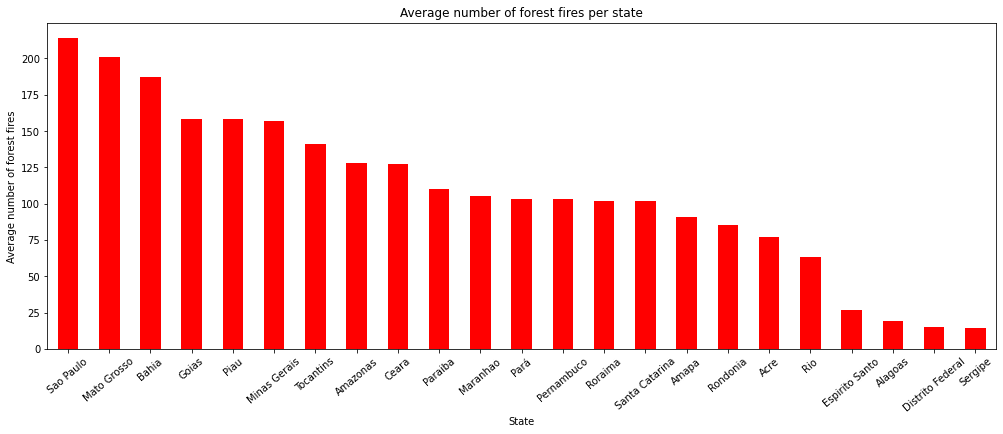

In [65]:
av_state_number.plot(kind='bar', y='number' , x='state', figsize=(17,6), rot=40, legend= False, colormap= 'prism',
                    xlabel= 'State' , ylabel= 'Average number of forest fires', title= 'Average number of forest fires per state')

Above is our first answer!

## Which month had most cases of forest fire since 1998?

In [73]:
amazon[amazon['number'] == max(amazon['number'])]

,year,state,month,number,date
888,2008,Amazonas,September,998.0,2008-01-01


It was September 2008 when the state of Amazonas reported most number of forest fires.

## Average number of forest fires in each month.

<AxesSubplot:title={'center':'Average number of forest fire cases reported by month'}, xlabel='Month', ylabel='Average cases'>

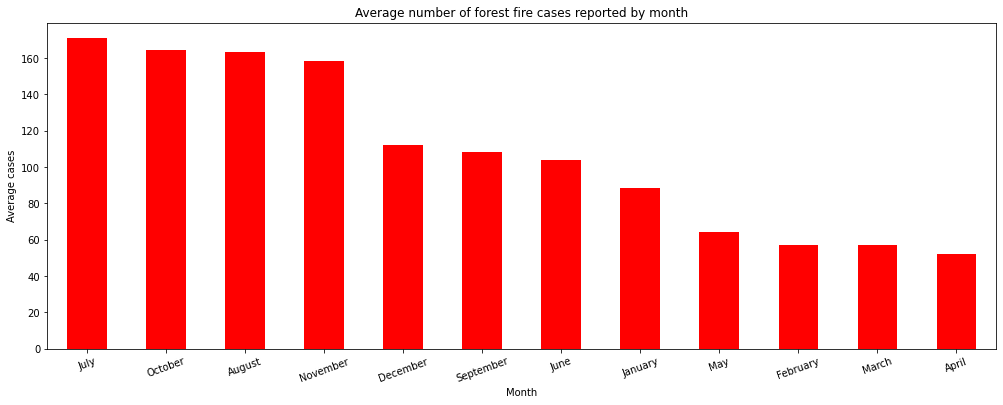

In [87]:
month_number = amazon.pivot_table('number', 'month' , aggfunc= np.mean)
month_number = month_number.sort_values(by='number', ascending= False)

month_number.plot(kind= 'bar', figsize= (17,6), colormap='prism', legend= False,rot = 20, sort_columns= True, 
                 ylabel= 'Average cases' , xlabel= 'Month' , title= 'Average number of forest fire cases reported by month')

The above graph indicates that July month followed by October, August and November reported highest number of forest fires in Brazil.